In [ ]:
import pandas as pd
import numpy as np

In [ ]:
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/iris.csv'
iris = pd.read_csv(url)
iris.head()

In [ ]:
iris.species.value_counts()

## Classification example: K nearest neighbors (KNN) and Logistic Regression

Split into feature and target sets (given X matrix -> prexict y vector)

Step 1

In [ ]:
# feature matrix
X = iris.drop('species',axis=1) # axis=1 denotes that we are referring to a column, not a row
X.isnull().sum() # check for missing values

In [ ]:
# target vector
y = iris['species']
y

#### Using Models in sci-kit learn

step 2 - import scikit and initialize the models

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression

In [ ]:
knn_iris = KNN(n_neighbors=3, weights='uniform')
logistic_iris = LogisticRegression()

Three notes:

1. Name of the model does not matter

2. Can specify tuning parameters during this step (hyperparamater tuning)

3. All parameters not specified are set to their defaults

Step 3 - fit the model ("train the model")

In [ ]:
knn_iris.fit(X,y)
logistic_iris.fit(X,y)

Step 4 - test the model (predict new values)

In [ ]:
new_flowers = [[3,5,4,2], # new flower 1: sepal_length=3, sepal_width=5, petal_length=4, petal_width = 2 
               [5,4,3,1]] # new flower 2: sepal_length=5, sepal_width=4, petal_length=3, petal_width = 1 
print('KNN prediction: ' + knn_iris.predict(new_flowers))
print('Logistic reg prediction: ' + logistic_iris.predict(new_flowers))

** questions!!**
- how does knn work?
- how do I choose the hyperparameters (n_neighbors and weights)?
- Will my classifier perform well on new data?
- What other classification models are there? Which one should I use?

## K nearest neighbors classifier examples

**Example 1:** the three blobs dataset

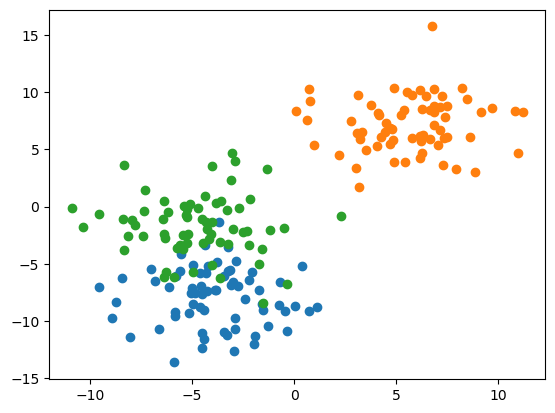

In [69]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=200, centers=3, cluster_std=2.5)

# plot the dataset
# plt.scatter(X[:,0],X[:,1],c=y) this is the same as the following three lines
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])

# # 3d blob plot
# from mpl_toolkits import mplot3d
# fig = plt.figure()
# ax = plt.axes(projection='3d')
# ax.scatter3D(X[:,0],X[:,1],X[:,2],c=y)

In [70]:
# plot classification regions
def draw_classification_regions(X,y,model):
    
    # classes 
    classes = model.classes_
    # feature names
    try:
        feature_names = X.columns
    except:
        feature_names = ['feature #1','feature #2']
    
    # put data into numpy arrays
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print('something went wrong')
    
    from matplotlib.colors import ListedColormap
    # create a mesh grid
    h = .1
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # evaluate classifier at all mesh grid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # number of classes
    n_classes = len(np.unique(y))
    
    # map classes to 0,1,2
    for i in range(n_classes):
        Z[Z==classes[i]]=i

    # Put the result into a color plot
    fig, ax = plt.subplots(figsize=(10,5))
    colors = ['C0','C1','C2']
    if n_classes==3:
        custom_cmap = ListedColormap(['#9898ff','#fafab0','#a0faa0'])
    else:
        custom_cmap = ListedColormap(['#9898ff','#fafab0'])
        
    ax.contourf(xx, yy, Z, cmap=custom_cmap)

    # plot dataset
    for i in range(n_classes):
        ax.scatter(X[y==classes[i],0], X[y==classes[i],1], c = colors[i], label=classes[i], s=75, alpha=0.8)

    ax.set_xlabel(feature_names[0], fontsize=15)
    ax.set_ylabel(feature_names[1], fontsize=15)

    ax.legend()

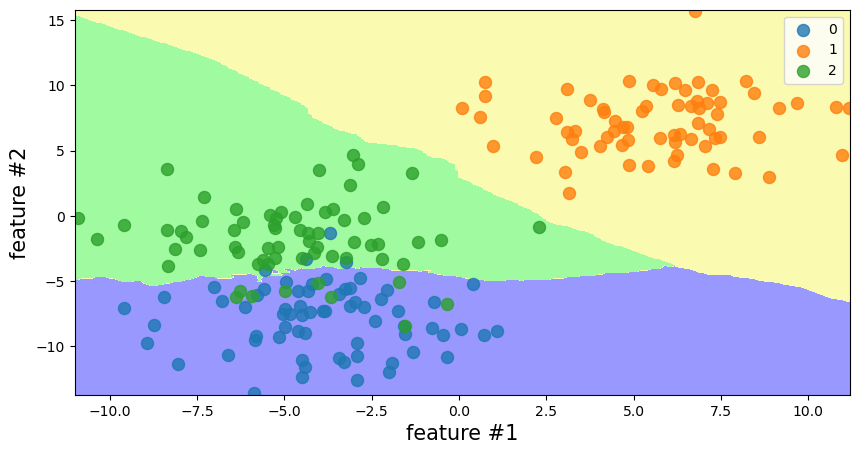

In [75]:
knn_blob = KNN(n_neighbors=10)
knn_blob.fit(X,y)
draw_classification_regions(X,y,knn_blob)